<a href="https://colab.research.google.com/github/AltuOs/deteccion_de_sepsis/blob/main/MODESAFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODESAFE:** **MO**delo para la **D**Etección de pacient**ES** **AF**ectados por s**E**psis
# Equipo: **MathHackers**

In [ ]:
#@markdown Montar Drive

from google.colab import drive
drive.mount('/gdrive')

%cd "/gdrive/MyDrive/Hackaton_2023/"

Mounted at /gdrive
/gdrive/MyDrive/Hackaton_2023


In [ ]:
#@markdown Importación de Librerias

# Librerias de manipulación de datos
import numpy as np # linear algebra
import pandas as pd # data processing
import os

# Librerias de visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Métodos de Machine Learning
from sklearn.model_selection import train_test_split # data splitting into train and test
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

In [ ]:

# @markdown Marque la casilla del item **procesar_datos_crudos** en caso de que no tenga el archivo sep_A.csv, se puede generar a partir de  la carpeta *training_setA* del repositorio del challenge.


procesar_datos_crudos = False # @param {type:"boolean"}

if procesar_datos_crudos:
  dataset_path = "physionet.org/files/challenge-2019/1.0.0/training/training_setA/"
  aux = pd.read_csv(dataset_path + "p000001.psv", sep= "|")

  dataset_columns = list(aux.columns)
  dataset_columns = ['patient_id'] + dataset_columns

  data = pd.DataFrame(columns=dataset_columns)

  contenido = os.listdir(dataset_path)
  print(dataset_columns)

  cont = 0
  for psv in contenido:
    if psv.endswith('.psv'):
      aux = pd.read_csv(dataset_path + psv, sep= "|")
      aux['patient_id'] = cont

      data = pd.concat([data, aux])
      cont += 1

  data.to_csv('sep_A.csv', index=False)
else:
  data = pd.read_csv('sep_A.csv')


data.head(15).T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
patient_id,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
HR,NaN,97.00,89.00,90.00,103.00,110.00,108.00,106.00,104.00,102.00,104.00,NaN,102.00,108.00,106.00
O2Sat,NaN,95.00,99.00,95.00,88.50,91.00,92.00,90.50,95.00,91.00,92.00,NaN,93.00,90.00,90.00
Temp,NaN,NaN,NaN,NaN,NaN,NaN,36.11,NaN,NaN,NaN,37.17,NaN,NaN,NaN,NaN
SBP,NaN,98.00,122.00,NaN,122.00,NaN,123.00,93.00,133.00,134.00,138.00,NaN,129.00,122.00,NaN
MAP,NaN,75.33,86.00,NaN,91.33,NaN,77.00,76.33,88.33,87.33,86.67,NaN,77.00,96.67,NaN
DBP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Resp,NaN,19.00,22.00,30.00,24.50,22.00,29.00,29.00,26.00,30.00,19.00,NaN,24.00,27.00,25.00
EtCO2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BaseExcess,NaN,NaN,NaN,24.00,NaN,NaN,NaN,NaN,NaN,NaN,23.00,NaN,NaN,NaN,NaN


# Análisis de datos

Observación del porcentaje de valores nulos en las diferentes columnas

In [ ]:
data.isna().sum(axis = 0).sort_values(ascending=False) / len(data) * 100

EtCO2               100.000000
Bilirubin_direct     99.865985
TroponinI            99.846468
Fibrinogen           99.111337
Bilirubin_total      98.654644
Alkalinephos         98.402228
AST                  98.361893
Lactate              96.513005
PTT                  95.135121
Calcium              94.956868
SaO2                 94.936050
Phosphate            94.843671
Platelets            93.435861
Creatinine           93.286233
WBC                  92.460023
Magnesium            92.141249
HCO3                 91.852401
BUN                  91.740505
Chloride             91.521917
PaCO2                91.118571
Hgb                  91.100355
BaseExcess           89.463549
Potassium            89.213735
pH                   88.451280
Hct                  88.330276
Glucose              87.800721
FiO2                 85.476925
Temp                 66.025216
Unit2                50.898422
Unit1                50.898422
DBP                  46.358822
SBP                  13.910249
O2Sat   

Descripción del dataset

In [ ]:
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
patient_id,76857.0,975.166010,557.443469,0.00,487.00,988.00,1452.00,1932.00
HR,71005.0,84.986486,17.200411,23.00,73.00,84.00,96.00,201.00
O2Sat,67696.0,97.233365,2.879442,22.00,96.00,98.00,99.50,100.00
Temp,26112.0,37.010344,0.769771,23.00,36.56,37.00,37.50,41.11
SBP,66166.0,120.695025,21.573008,31.00,105.00,118.00,134.00,272.50
MAP,69141.0,78.730787,14.953564,20.00,68.00,77.00,87.33,297.00
DBP,41227.0,59.859679,12.331899,20.00,51.00,59.00,67.00,269.00
Resp,69457.0,18.787862,5.395740,1.00,15.00,18.00,22.00,59.00
EtCO2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BaseExcess,8098.0,-0.797049,4.339784,-26.00,-3.00,0.00,1.00,36.00


## Tratamiento de los valores nan

Debido a que el dataset contiene un alto porcentaje de valores nan en sus columnas de signos vitales y de análisis de sangre, se optó por realizar una interpolación lineal por paciente, debido a que sus análisis de sangre y signos vitales no cambian drásticamente en cuestión de algunas horas.

In [ ]:
data["SepsisLabel"].value_counts()

data = data.groupby('patient_id', group_keys=False).apply(lambda group: group.interpolate(axis=0, limit_direction="both"))

data.head(20)

,patient_id,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,0,97.0,95.0,36.1100,98.0,75.330,NaN,19.0,NaN,24.000000,...,5.700000,NaN,317.000000,83.14,0,NaN,NaN,-0.03,1,0
1,0,97.0,95.0,36.1100,98.0,75.330,NaN,19.0,NaN,24.000000,...,5.700000,NaN,317.000000,83.14,0,NaN,NaN,-0.03,2,0
2,0,89.0,99.0,36.1100,122.0,86.000,NaN,22.0,NaN,24.000000,...,5.700000,NaN,317.000000,83.14,0,NaN,NaN,-0.03,3,0
3,0,90.0,95.0,36.1100,122.0,88.665,NaN,30.0,NaN,24.000000,...,5.700000,NaN,317.000000,83.14,0,NaN,NaN,-0.03,4,0
4,0,103.0,88.5,36.1100,122.0,91.330,NaN,24.5,NaN,23.857143,...,5.700000,NaN,317.000000,83.14,0,NaN,NaN,-0.03,5,0
5,0,110.0,91.0,36.1100,122.5,84.165,NaN,22.0,NaN,23.714286,...,5.700000,NaN,317.000000,83.14,0,NaN,NaN,-0.03,6,0
6,0,108.0,92.0,36.1100,123.0,77.000,NaN,29.0,NaN,23.571429,...,5.700000,NaN,317.000000,83.14,0,NaN,NaN,-0.03,7,0
7,0,106.0,90.5,36.3750,93.0,76.330,NaN,29.0,NaN,23.428571,...,5.700000,NaN,317.000000,83.14,0,NaN,NaN,-0.03,8,0
8,0,104.0,95.0,36.6400,133.0,88.330,NaN,26.0,NaN,23.285714,...,5.700000,NaN,317.000000,83.14,0,NaN,NaN,-0.03,9,0
9,0,102.0,91.0,36.9050,134.0,87.330,NaN,30.0,NaN,23.142857,...,5.700000,NaN,317.000000,83.14,0,NaN,NaN,-0.03,10,0


## División del dataset en conjuntos de entrenanamiento y de prueba

El dataset se dividió de la siguiente manera:

* Entrenamiento: 75%
* Validación: 15%
* Prueba: 15%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop("SepsisLabel", axis=1), data["SepsisLabel"], test_size=0.25, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Selección de características de los datos

<ipython-input-8-c98e7b3bb423>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,i)


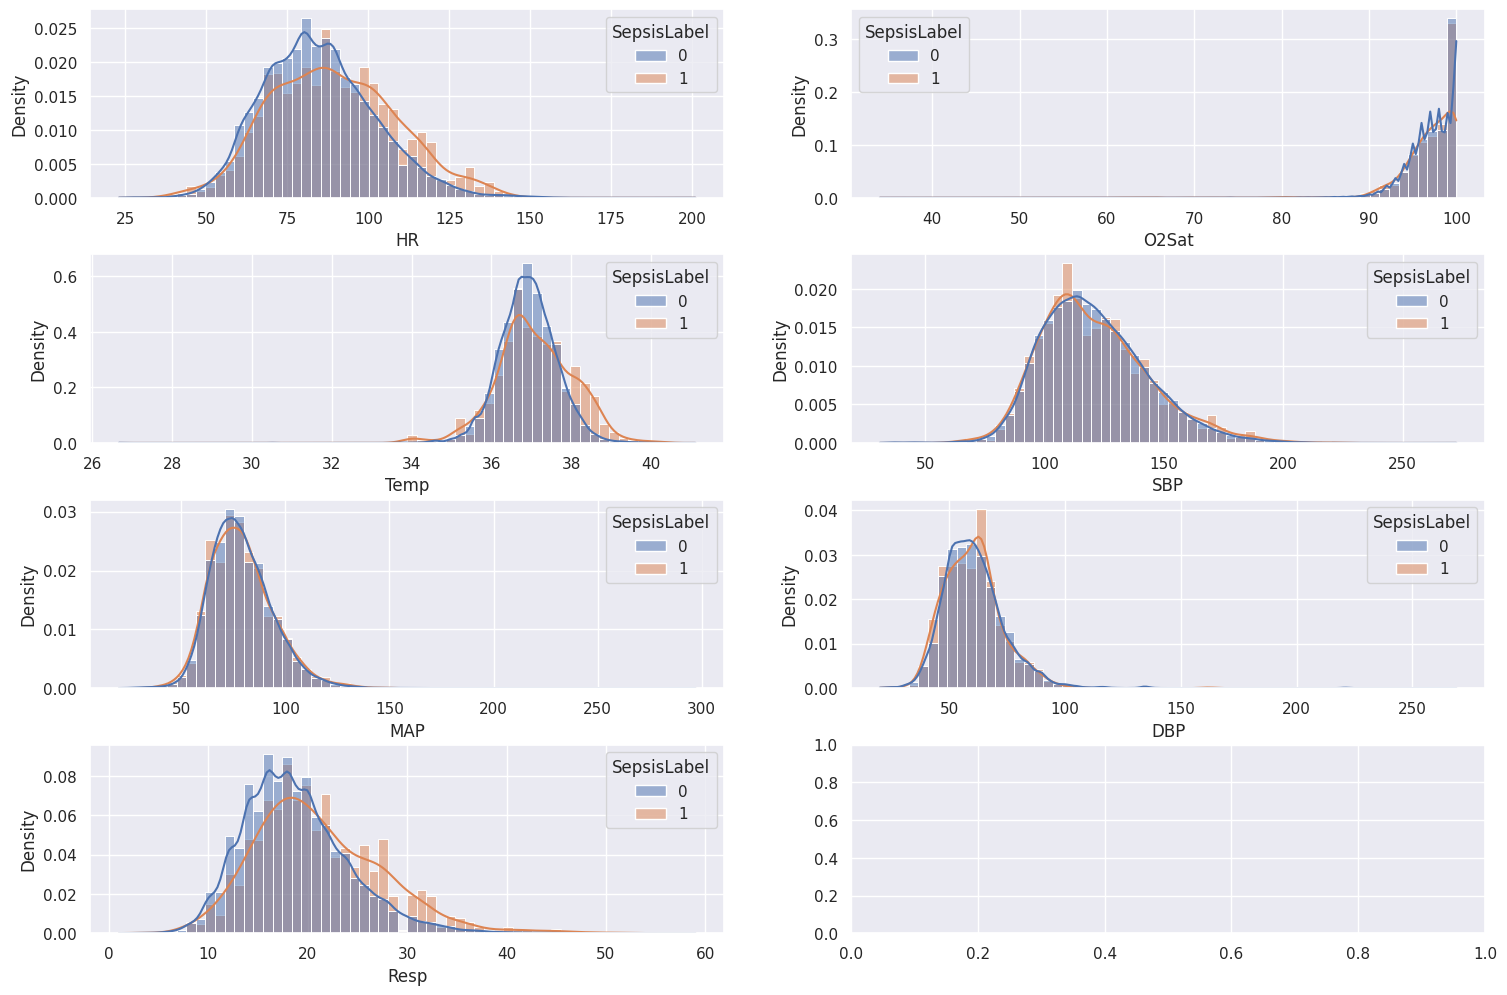

In [ ]:
#@markdown Gráficas de densidad de los signos vitales

# set plots style
sns.set_theme()#(context="notebook", style="whitegrid", palette="tab10")

vital_signs = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "EtCO2"]

plt.figure(figsize=(18,12))
plt.title('Gráficas de densidad')
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(vital_signs, 1):
    plt.subplot(4,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", common_norm=False, bins=60, kde=True)

plt.show()

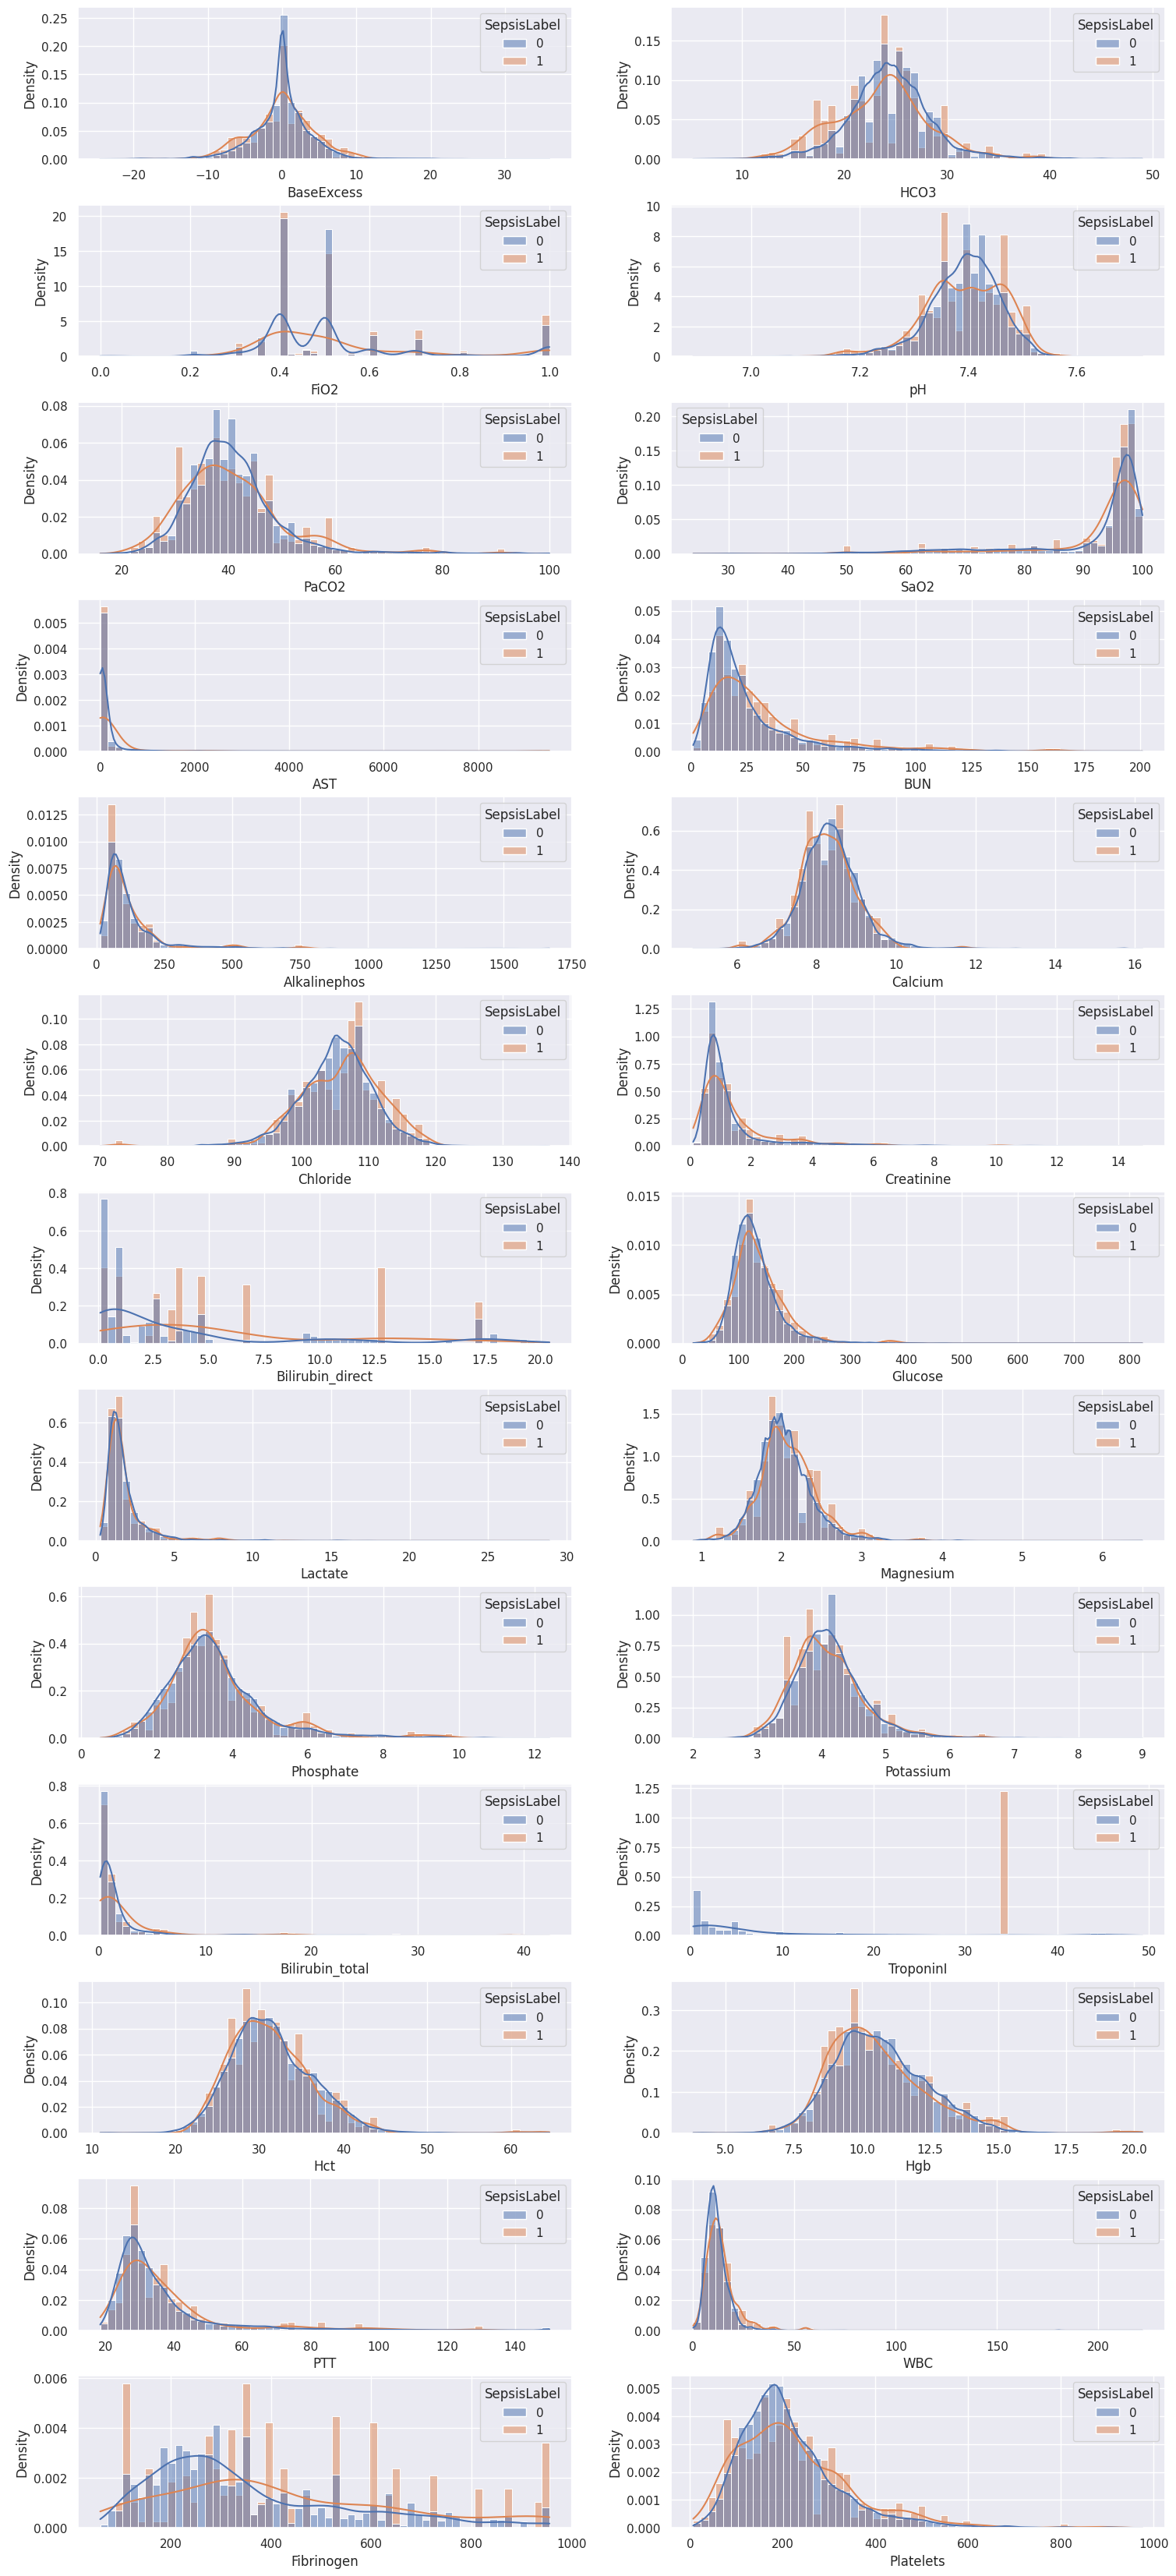

In [ ]:
#@markdown Gráficas de densidad de los análisis de laboratorio

#X_train.columns

lab_values = ['BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets']

plt.figure(figsize=(18,42))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(lab_values, 1):
    plt.subplot(13,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)

#plt.savefig("lab_values.png", dpi=400)

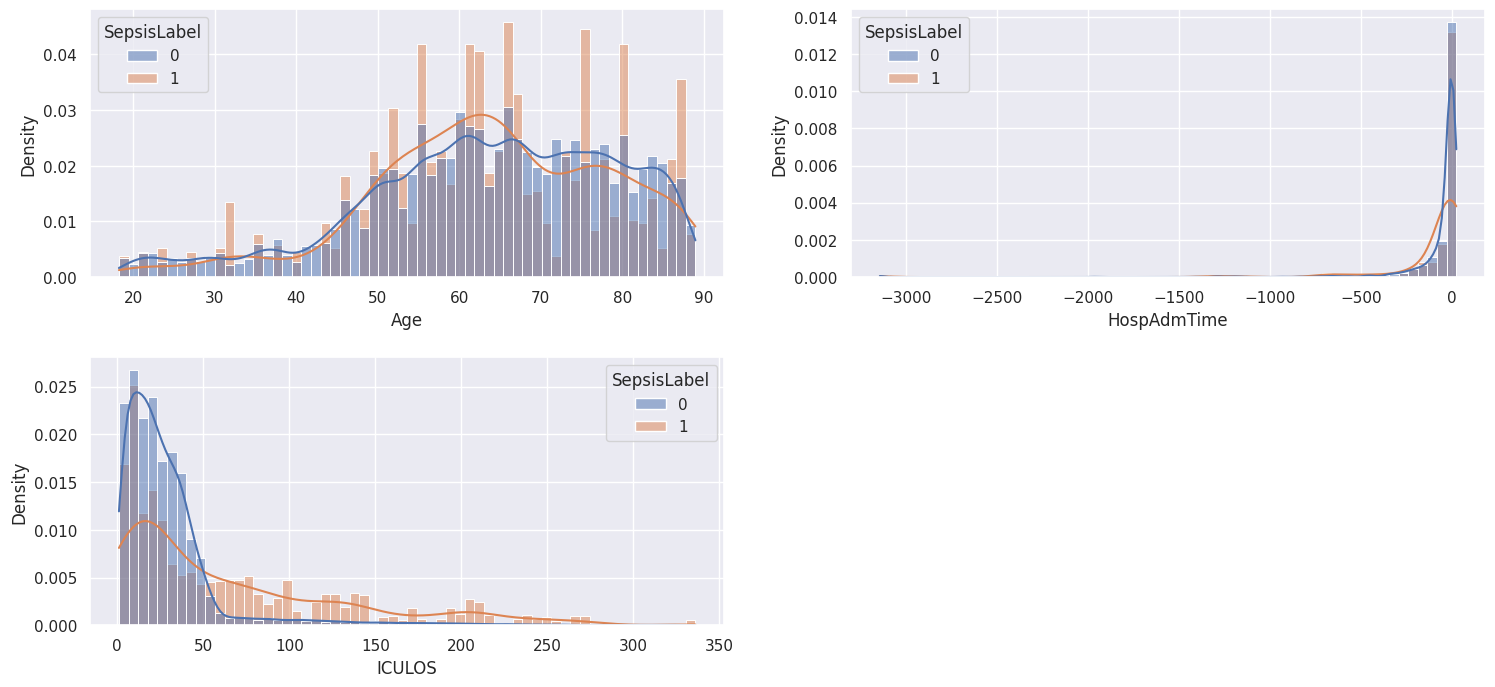

In [ ]:
#@markdown Gráficas de densidad de la demografía poblacional

demographics = ["Age", "HospAdmTime", "ICULOS"]

plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace = .3)
for i, column in enumerate(demographics, 1):
    plt.subplot(2,2,i)
    sns.histplot(data=X_train, x=column, hue=y_train, stat="density", bins=60, common_norm=False, kde=True)

#plt.savefig("demographics.png", dpi=400)

In [ ]:
def plotGender(data):
    gender = data
    gender[gender==0] = "female"
    gender[gender==1] = "male"

    sns.countplot(x=gender, hue=y_train, dodge=False)

def plotUnit(data):
    Unit1 = data["Unit1"][data["Unit1"]==1].count() # patients in Unit1
    Unit2 = data["Unit2"][data["Unit2"]==1].count() # patients in Unit2
    totalNa = len(data["Unit1"][(data["Unit1"].isna()) & (data["Unit2"].isna())])

    sns.barplot(x=["Medical ICU","Surgical ICU","Not Given"] ,y=[Unit1, Unit2, totalNa])

<ipython-input-11-d49d10151b8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender[gender==0] = "female"


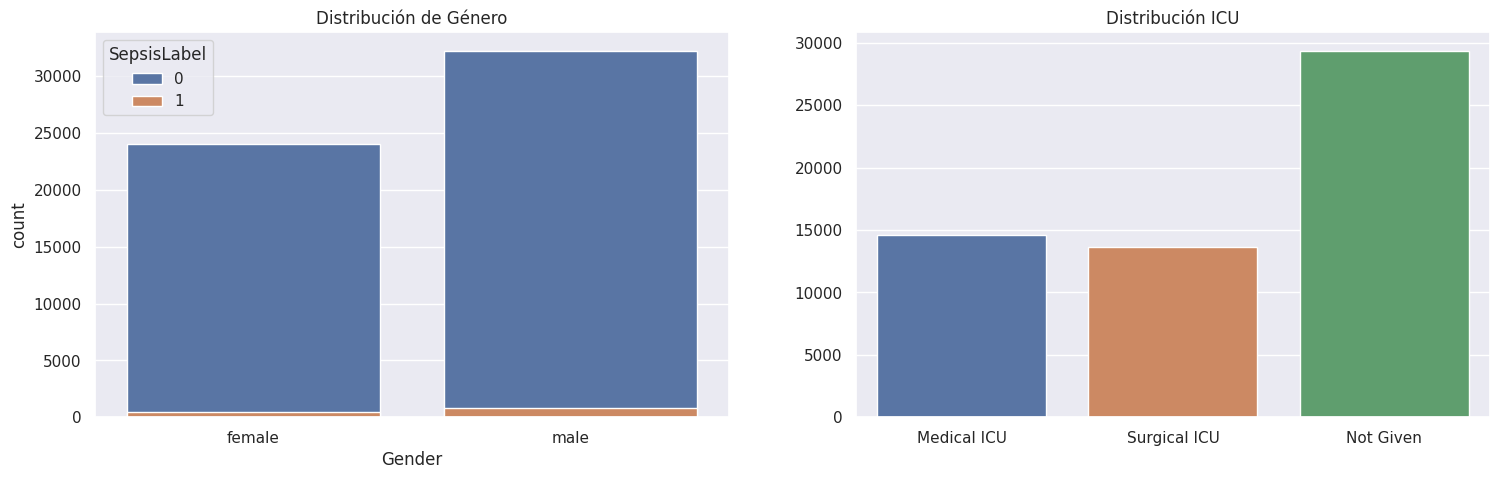

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title("Distribución de Género")
plotGender(X_train["Gender"])
plt.subplot(1,2,2)
plt.title("Distribución ICU")
plotUnit(X_train)

#plt.savefig("additional.png", dpi=400)

In [ ]:
def CombineUnits(units_cols):
    data = units_cols.copy()
    data["Unit"] = pd.Series(np.zeros((len(data))))
    data.loc[data["Unit1"] == 1, "Unit"] = "MICU"
    data.loc[data["Unit2"] == 1, "Unit"] = "SICU"
    data.loc[(data["Unit1"].isna()) & (data["Unit2"].isna()), "Unit"] = "Other ICU"
    return data[["Unit"]]


def ShareSepticByUnit(UnitCol, y):
    shares = {}

    IsSepsis_micu = y.loc[UnitCol["Unit"] == "MICU"]
    IsSepsis_sicu = y.loc[UnitCol["Unit"] == "SICU"]
    IsSepsis_other = y.loc[UnitCol["Unit"] == "Other ICU"]

    shares["MICU"] = IsSepsis_micu[IsSepsis_micu == 1].count() / len(IsSepsis_micu) * 100
    shares["SICU"] = IsSepsis_sicu[IsSepsis_sicu == 1].count() / len(IsSepsis_sicu) * 100
    shares["Other"] = IsSepsis_other[IsSepsis_other == 1].count() / len(IsSepsis_other) * 100

    return shares

IsSeptic_shares = ShareSepticByUnit(CombineUnits(X_train.copy()), y_train)

<Axes: ylabel='Developed Sepsis (%)'>

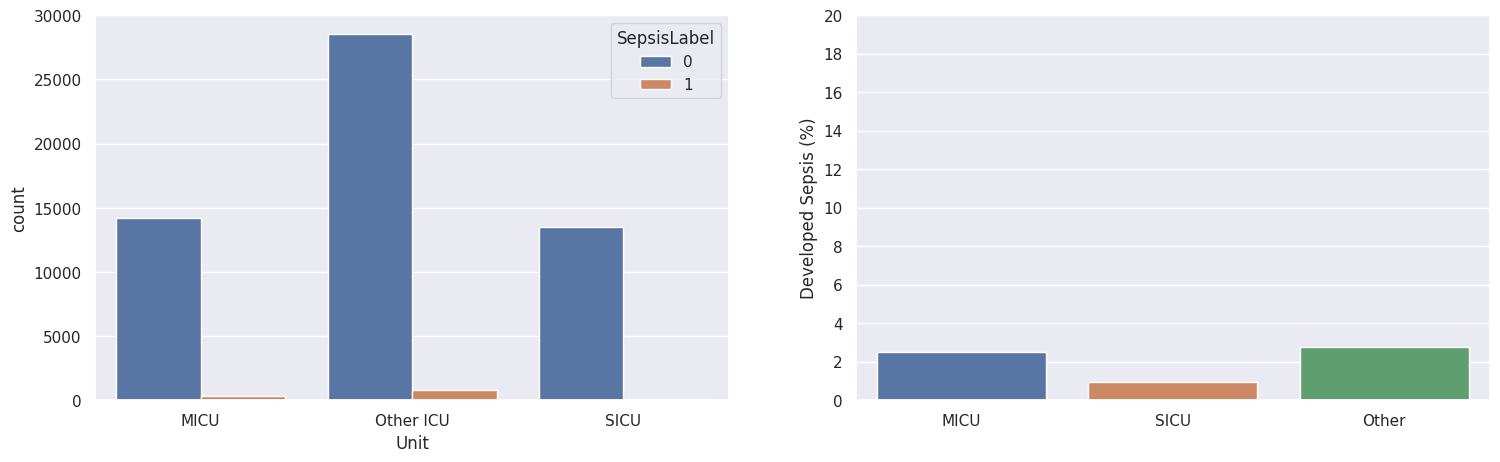

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.countplot(data=CombineUnits(X_train.copy()), x="Unit", hue=y_train)
plt.subplot(1,2,2)
plt.ylim([0,20])
plt.ylabel("Developed Sepsis (%)")
plt.yticks([i for i in range(0,21,2)])
sns.barplot(x=list(IsSeptic_shares.keys()), y=list(IsSeptic_shares.values()))

#plt.savefig("add2.png", dpi=400)

<Axes: >

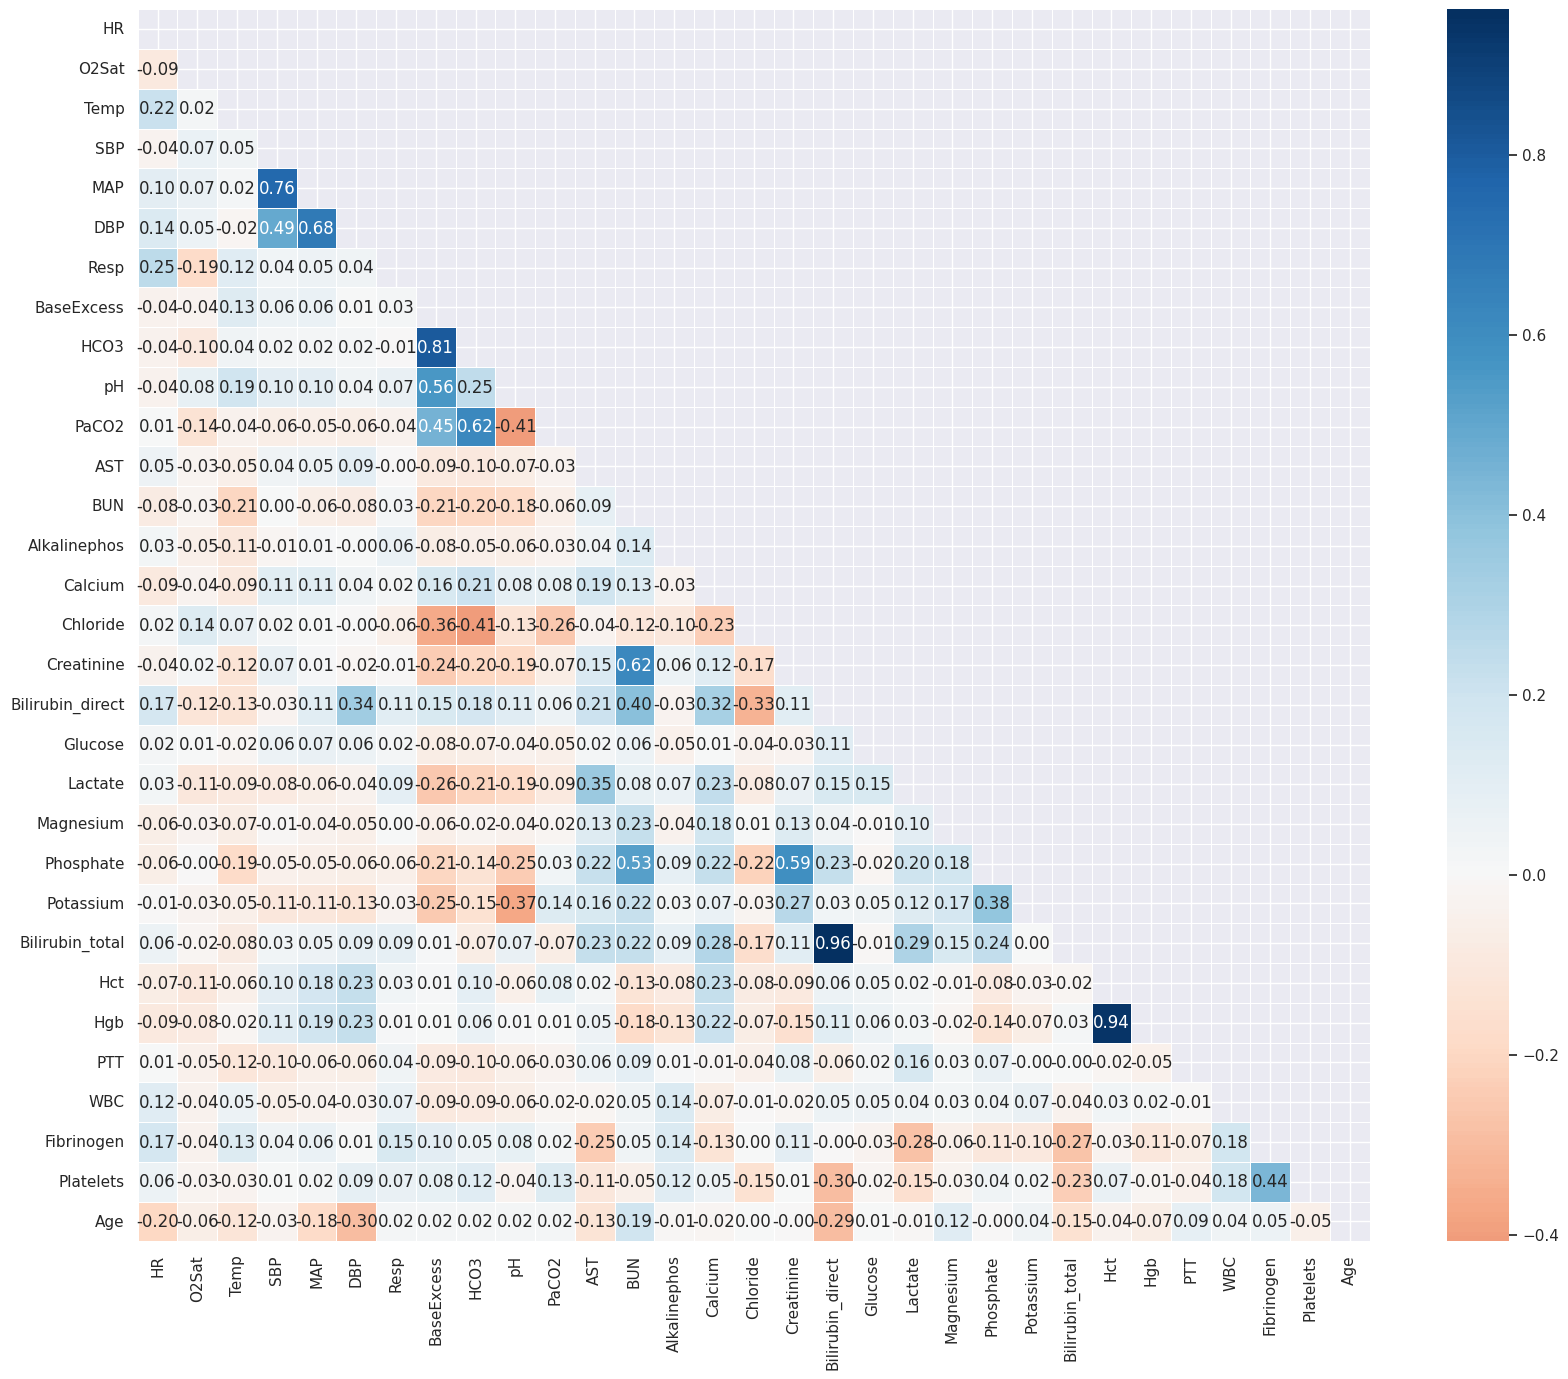

In [ ]:
#@markdown Matriz de correlación de los datos

correlation_features = ["HR", "O2Sat", "Temp", "SBP", "MAP", "DBP", "Resp", "BaseExcess", "HCO3", "pH", "PaCO2", "AST",
                       "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate",
                       "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "Hct", "Hgb", "PTT", "WBC",
                       "Fibrinogen", "Platelets", "Age"]

mat_corr = X_train[correlation_features].corr()

mask = np.zeros_like(mat_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,16))
sns.heatmap(mat_corr, mask=mask, square=True, annot=True, fmt=".2f", center=0, linewidths=.5, cmap="RdBu")

In [ ]:
mat_corr["Bilirubin_total"].sort_values(ascending=False)[:3]

Bilirubin_total     1.000000
Bilirubin_direct    0.961418
Lactate             0.293905
Name: Bilirubin_total, dtype: float64

In [ ]:
mat_corr["DBP"].sort_values(ascending=False)[:3]

DBP    1.000000
MAP    0.682258
SBP    0.490944
Name: DBP, dtype: float64

In [ ]:
mat_corr["SBP"].sort_values(ascending=False)[:3]

SBP    1.000000
MAP    0.755590
DBP    0.490944
Name: SBP, dtype: float64

In [ ]:
mat_corr["HCO3"].sort_values(ascending=False)[:4]

HCO3          1.000000
BaseExcess    0.811334
PaCO2         0.620001
pH            0.247059
Name: HCO3, dtype: float64

In [ ]:
mat_corr["pH"].sort_values(ascending=False)[:4]

pH            1.000000
BaseExcess    0.559937
HCO3          0.247059
Temp          0.187936
Name: pH, dtype: float64

In [ ]:
mat_corr["PaCO2"].sort_values(ascending=False)[:4]

PaCO2         1.000000
HCO3          0.620001
BaseExcess    0.453714
Potassium     0.135951
Name: PaCO2, dtype: float64

In [ ]:
mat_corr["Hgb"].sort_values(ascending=False)[:3]

Hgb    1.000000
Hct    0.940397
DBP    0.233420
Name: Hgb, dtype: float64

# Procesamiento de datos

Ahora que se sabe que características se van a conservar del dataset, se pueden procesar las características faltantes.

In [ ]:
def discretizateAge(data):
    # teen, youth, adult, senior
    bins = [13, 18, 30, 60, np.inf]
    data = np.digitize(data, bins=bins)
    data = data.reshape(len(data), 1)
    return data

DiscretizateAge = FunctionTransformer(discretizateAge)
DiscretizateAge.fit_transform(X_train["Age"]).shape

(57642, 1)

In [ ]:
age_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("discretizator", DiscretizateAge)
])

age_pipeline.fit_transform(X_train[["Age"]]).shape

(57642, 1)

In [ ]:
CombineAllUnits = FunctionTransformer(CombineUnits)

units = ["Unit1", "Unit2"]

units_pipeline = Pipeline([
    ("combine", CombineAllUnits),
    ("encoder", OneHotEncoder(sparse=False))
])
units_pipeline.fit_transform(X_train[units]).shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(57642, 3)

In [ ]:
acidbase_features = ["BaseExcess", "PaCO2"]

def isAcidBaseDisturb(cols):
    cols = np.c_[cols, np.zeros(len(cols))]
    cols[:,2][(cols[:,0] < -2) & (cols[:,1] < 40)] = 1
    col = cols[:,2].reshape(len(cols), 1)
    return col

FindAcidosis = FunctionTransformer(isAcidBaseDisturb)
FindAcidosis.fit_transform(X_train[acidbase_features])

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
acidbase_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("acidosis", FindAcidosis)
])

acidbase_pipeline.fit_transform(X_train[acidbase_features]).shape

(57642, 1)

In [ ]:
num_features = ["HR", "O2Sat", "Temp", "MAP", "Resp", "AST", "BUN",
                "Alkalinephos", "Calcium", "Creatinine", "Glucose", "Bilirubin_total",
                "Hgb", "PTT", "WBC", "Fibrinogen", "Platelets", "ICULOS"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

num_pipeline.fit_transform(X_train[num_features]).shape

(57642, 18)

In [ ]:
gender_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder())
])

gender_pipeline.fit_transform(X_train[["Gender"]])

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]])

In [ ]:
preprocessing_pipeline = ColumnTransformer([
    ("numbers", num_pipeline, num_features),
    ("acidbase", acidbase_pipeline, acidbase_features),
    ("age", age_pipeline, ["Age"]),
    ("units", units_pipeline, units),
    ("gender", gender_pipeline, ["Gender"])
], verbose=True)

preprocessing_pipeline.fit_transform(X_train).shape

[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.3s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.1s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(57642, 24)

In [ ]:
X_train = preprocessing_pipeline.fit_transform(X_train)
X_test =  preprocessing_pipeline.fit_transform(X_test)
X_val =  preprocessing_pipeline.fit_transform(X_val)

[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.2s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.0s
[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.0s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[ColumnTransformer] ........ (5 of 5) Processing gender, total=   0.0s
[ColumnTransformer] ....... (1 of 5) Processing numbers, total=   0.0s
[ColumnTransformer] ...... (2 of 5) Processing acidbase, total=   0.0s
[ColumnTransformer] ........... (3 of 5) Processing age, total=   0.0s
[ColumnTransformer] ......... (4 of 5) Processing units, total=   0.0s
[Colum

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#!pip install dill

In [ ]:
save_preprocessing_pipeline = False

if save_preprocessing_pipeline:
  import dill
  with open('preprocessing_pipeline.pkl', 'wb') as file:
    dill.dump(preprocessing_pipeline, file)

'''
with open('preprocessing_pipeline.pkl', 'rb') as file:
  preprocessing_pipeline2 = dill.load(file)
'''

"\nwith open('preprocessing_pipeline.pkl', 'rb') as file:\n  preprocessing_pipeline2 = dill.load(file)\n"

# Modelo de Red Neuronal

## Definición del modelo

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint


model = Sequential(name = 'clasificador')


model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu', input_shape =(np.shape(X_train)[1],1), name = 'Layer1'))
model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu' , name = 'Layer2'))
model.add(Conv1D(filters = 64, kernel_size = 3, activation ='relu' , name = 'Layer3'))

model.add(MaxPooling1D(pool_size = 2, name = 'MaxPooling_Layer2'))
model.add(Flatten(name = 'Flatten'))

model.add(Dense(25, activation='relu', name = 'DenseLayer'))
model.add(Dense(10, activation='relu', name = 'DenseLayer2'))
model.add(Dense(5, activation='relu', name = 'DenseLayer3'))

model.add(Dense(1, activation='sigmoid', name = 'OutputLayer'))

In [ ]:
#@markdown Resumen del modelo

model.summary()

Model: "clasificador"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer1 (Conv1D)             (None, 22, 64)            256       
                                                                 
 Layer2 (Conv1D)             (None, 20, 64)            12352     
                                                                 
 Layer3 (Conv1D)             (None, 18, 64)            12352     
                                                                 
 MaxPooling_Layer2 (MaxPool  (None, 9, 64)             0         
 ing1D)                                                          
                                                                 
 Flatten (Flatten)           (None, 576)               0         
                                                                 
 DenseLayer (Dense)          (None, 25)                14425     
                                                      

## Compilación y entrenamiento del modelo

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

checkpoint = ModelCheckpoint(filepath = 'mejor_modelo_validacion.h5',
                             monitor = 'val_accuracy',
                             mode ='max',
                             save_best_only = True,
                             verbose = 1)

In [ ]:
from sklearn.utils import class_weight
hist = model.fit(X_train,
                       y_train,
                       epochs = 100,
                       batch_size = 256,
                      validation_data = (X_val, y_val),
                 class_weight = {0: 0.15, 1: 0.85},
                 callbacks=[checkpoint]
                       )

Epoch 1/100
226/226 [==============================] - ETA: 0s - loss: 0.0622 - accuracy: 0.9687
Epoch 1: val_accuracy improved from -inf to 0.97419, saving model to mejor_modelo_validacion.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


226/226 [==============================] - 11s 41ms/step - loss: 0.0622 - accuracy: 0.9687 - val_loss: 0.1831 - val_accuracy: 0.9742
Epoch 2/100
225/226 [============================>.] - ETA: 0s - loss: 0.0512 - accuracy: 0.9759
Epoch 2: val_accuracy did not improve from 0.97419
226/226 [==============================] - 7s 30ms/step - loss: 0.0513 - accuracy: 0.9759 - val_loss: 0.1700 - val_accuracy: 0.9740
Epoch 3/100
224/226 [============================>.] - ETA: 0s - loss: 0.0485 - accuracy: 0.9762
Epoch 3: val_accuracy did not improve from 0.97419
226/226 [==============================] - 9s 41ms/step - loss: 0.0485 - accuracy: 0.9762 - val_loss: 0.1499 - val_accuracy: 0.9703
Epoch 4/100
225/226 [============================>.] - ETA: 0s - loss: 0.0452 - accuracy: 0.9753
Epoch 4: val_accuracy did not improve from 0.97419
226/226 [==============================] - 7s 29ms/step - loss: 0.0452 - accuracy: 0.9753 - val_loss: 0.1643 - val_accuracy: 0.9736
Epoch 5/100
224/226 [======

# Evaluación del modelo y resultados

In [ ]:
#@markdown Presione la casilla si quiere cargar el modelo con la mejor loss de validacion del entrenamiento del modelo:
usar_mejor_modelo = True # @param {type:"boolean"}

if usar_mejor_modelo:
  model.load_weights("mejor_modelo_validacion.h5")


In [ ]:
pred = model.predict(X_test)

301/301 [==============================] - 1s 3ms/step


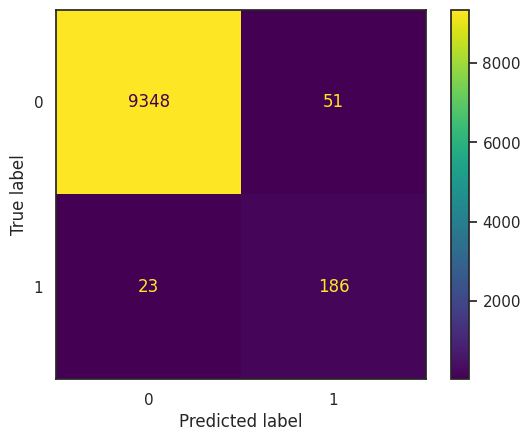

In [ ]:
#@markdown Matriz de Confusión
sns.set_theme(style="white")
from  sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, classification_report

predicted = tf.squeeze(pred)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()


In [ ]:
#@markdown Reporte de métricas accuracy, precisión, recall y f1-score
print(classification_report(predicted, np.array(y_test),
      target_names = ['clase 0', 'clase 1'],
      digits=4
                            ))

              precision    recall  f1-score   support

     clase 0     0.9946    0.9975    0.9961      9371
     clase 1     0.8900    0.7848    0.8341       237

    accuracy                         0.9923      9608
   macro avg     0.9423    0.8912    0.9151      9608
weighted avg     0.9920    0.9923    0.9921      9608



# Referencias

[1] Sepsis prediction from clinical data, https://www.kaggle.com/code/maxskoryk/sepsis-prediction-from-clinical-data/notebook